In [601]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from imblearn.over_sampling import SMOTE

In [602]:
df = pd.read_csv('Corrected_Combined_Data.csv', encoding='latin-1')

In [603]:
df

,Source.Name,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,index2013_data.xls,1,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,15.0,...,Afghanistan,31.1,$29.7,5.7,10.3,$956,NaN,11.2,$83.4,12.1
1,index2013_data.xls,2,Albania,Albania,Europe,58.0,27.0,65.2,30.0,31.0,...,Albania,3.2,$24.9,2.0,4.4,"$7,741",13.5,3.4,"$1,031.4",58.9
2,index2013_data.xls,3,Algeria,Algeria,Middle East / North Africa,145.0,14.0,49.6,30.0,29.0,...,Algeria,36.0,$263.7,2.5,2.7,"$7,333",10.0,4.5,"$2,571.0",9.9
3,index2013_data.xls,4,Angola,Angola,Sub-Saharan Africa,158.0,40.0,47.3,15.0,20.0,...,Angola,19.6,$115.7,3.4,8.8,"$5,895",NaN,13.5,"$-5,585.5",30.9
4,index2013_data.xls,5,Argentina,Argentina,South and Central America / Caribbean,160.0,27.0,46.7,15.0,30.0,...,Argentina,40.9,$716.4,8.9,6.8,"$17,516",7.2,9.8,"$7,243.1",44.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,index2022_data.xls,179,Venezuela,Venezuela,Americas,176.0,32.0,24.8,0.2,NaN,...,Venezuela,28.4,$144.7,-30.0,-23.5,"$5,178",9.1,2355.1,959.0,304.1
1840,index2022_data.xls,180,Vietnam,Vietnam,Asia-Pacific,84.0,18.0,60.6,49.6,NaN,...,Vietnam,97.3,"$1,058.7",2.9,6.1,"$10,869",2.3,3.2,"15,800.0",46.6
1841,index2022_data.xls,181,Yemen,Yemen,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN,...,Yemen,29.8,$62.6,-5.0,-3.3,"$1,927",13.4,26.2,-371.0,83.2
1842,index2022_data.xls,182,Zambia,Zambia,Sub-Saharan Africa,154.0,36.0,48.7,38.3,NaN,...,Zambia,18.4,$63.1,-3.5,1.9,"$3,342",12.2,16.4,234.0,117.8


In [604]:
df=df.drop('Source.Name', axis=1)

In [605]:
df.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,15.0,NaN,...,Afghanistan,31.1,$29.7,5.7,10.3,$956,NaN,11.2,$83.4,12.1
1,2,Albania,Albania,Europe,58.0,27.0,65.2,30.0,31.0,92.6,...,Albania,3.2,$24.9,2.0,4.4,"$7,741",13.5,3.4,"$1,031.4",58.9
2,3,Algeria,Algeria,Middle East / North Africa,145.0,14.0,49.6,30.0,29.0,80.4,...,Algeria,36.0,$263.7,2.5,2.7,"$7,333",10.0,4.5,"$2,571.0",9.9
3,4,Angola,Angola,Sub-Saharan Africa,158.0,40.0,47.3,15.0,20.0,82.6,...,Angola,19.6,$115.7,3.4,8.8,"$5,895",NaN,13.5,"$-5,585.5",30.9
4,5,Argentina,Argentina,South and Central America / Caribbean,160.0,27.0,46.7,15.0,30.0,64.3,...,Argentina,40.9,$716.4,8.9,6.8,"$17,516",7.2,9.8,"$7,243.1",44.2


In [606]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    1844 non-null   int64  
 1   Country Name                 1844 non-null   object 
 2   WEBNAME                      1844 non-null   object 
 3   Region                       1844 non-null   object 
 4   World Rank                   1782 non-null   float64
 5   Region Rank                  1782 non-null   float64
 6   Year Score                   1782 non-null   float64
 7   Property Rights              1816 non-null   float64
 8   Freedom from Corruption      730 non-null    float64
 9   Fiscal Freedom               720 non-null    float64
 10  Gov't Spending               1813 non-null   float64
 11  Business Freedom             1828 non-null   float64
 12  Labor Freedom                1824 non-null   float64
 13  Monetary Freedom  

In [607]:
df.describe()

,CountryID,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov't Spending,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Income Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),Inflation (%),Public Debt (% of GDP)
count,1844.000000,1782.000000,1782.000000,1782.000000,1816.000000,730.000000,720.000000,1813.000000,1828.000000,1824.000000,1819.000000,1804.000000,1815.000000,1795.000000,1824.000000,1797.000000,1808.000000,1844.000000,1822.000000,1797.000000
mean,93.300434,89.687991,20.103255,60.763749,49.286674,41.090548,77.596111,63.784777,63.806072,59.673465,74.945739,74.107871,56.068871,48.690808,28.219408,22.159265,33.582444,121.261329,528.585016,54.735156
std,53.695508,51.493661,12.616865,11.127318,22.746397,20.541240,13.050677,23.749408,16.088759,14.923554,10.877045,12.450160,22.827023,19.143060,13.336844,16.673779,13.958505,1756.584239,21787.287704,35.970606
min,1.000000,1.000000,1.000000,1.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,10.100000,0.036000,-16.400000,0.000000
25%,47.000000,45.000000,9.000000,53.900000,30.000000,26.000000,70.900000,51.000000,54.100000,50.200000,71.550000,66.800000,40.000000,30.000000,20.000000,13.700000,24.400000,2.400000,1.200000,32.600000
50%,93.000000,90.000000,19.000000,60.700000,46.750000,34.650000,79.300000,69.300000,64.300000,59.700000,76.900000,75.800000,60.000000,50.000000,30.000000,20.200000,32.000000,9.050000,2.900000,47.100000
75%,140.000000,134.000000,30.000000,68.300000,65.925000,53.375000,85.800000,82.100000,74.900000,69.925000,81.200000,84.000000,75.000000,60.000000,35.000000,28.700000,40.400000,29.325000,5.800000,69.900000
max,186.000000,180.000000,47.000000,90.200000,100.000000,95.000000,99.900000,97.000000,100.000000,98.500000,91.700000,95.000000,95.000000,90.000000,100.000000,342.000000,156.400000,38000.000000,929789.500000,304.100000


In [608]:
df.dtypes

CountryID                        int64
Country Name                    object
WEBNAME                         object
Region                          object
World Rank                     float64
Region Rank                    float64
Year Score                     float64
Property Rights                float64
Freedom from Corruption        float64
Fiscal Freedom                 float64
Gov't Spending                 float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                 object
Income Tax Rate (%)            float64
Corporate Tax Rate (%)          object
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Country                         object
Population (Millions)          float64
GDP (Billions, PPP)             object
GDP Growth Rate (%)      

In [609]:
#checking missing values
df.isnull().sum()

CountryID                         0
Country Name                      0
WEBNAME                           0
Region                            0
World Rank                       62
Region Rank                      62
Year Score                       62
Property Rights                  28
Freedom from Corruption        1114
Fiscal Freedom                 1124
Gov't Spending                   31
Business Freedom                 16
Labor Freedom                    20
Monetary Freedom                 25
Trade Freedom                    40
Investment Freedom               29
Financial Freedom                49
Tariff Rate (%)                  46
Income Tax Rate (%)              20
Corporate Tax Rate (%)           20
Tax Burden % of GDP              47
Gov't Expenditure % of GDP       36
Country                           0
Population (Millions)             0
GDP (Billions, PPP)               8
GDP Growth Rate (%)               5
5 Year GDP Growth Rate (%)       28
GDP per Capita (PPP)        

In [610]:
#checking data for Afghanistan
df.iloc[0]

CountryID                                 1
Country Name                    Afghanistan
WEBNAME                         Afghanistan
Region                         Asia-Pacific
World Rank                              NaN
Region Rank                             NaN
Year Score                              NaN
Property Rights                         NaN
Freedom from Corruption                  15
Fiscal Freedom                          NaN
Gov't Spending                         83.2
Business Freedom                       59.7
Labor Freedom                          75.8
Monetary Freedom                       69.5
Trade Freedom                           NaN
Investment Freedom                       65
Financial Freedom                       NaN
Tariff Rate (%)                         NaN
Income Tax Rate (%)                      20
Corporate Tax Rate (%)                 20.0
Tax Burden % of GDP                     9.2
Gov't Expenditure % of GDP             23.7
Country                         

In [611]:
df.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', 'Year Score', 'Property Rights',
       'Freedom from Corruption', 'Fiscal Freedom ', 'Gov't Spending',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [612]:
#checing for countries having no rank
df_null=df[df['World Rank'].isna()]

In [613]:
#df_null=df_null.drop(index=df.index[-4:], 
        #axis=0, 
       # inplace=True)

In [614]:
df_null = df_null.iloc[:-4 , :]

In [615]:
df_null

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,15.0,NaN,...,Afghanistan,31.100,$29.7,5.7,10.3,$956,NaN,11.2,$83.4,12.1
76,77,Iraq,Iraq,Middle East / North Africa,NaN,NaN,NaN,NaN,18.0,NaN,...,Iraq,32.800,$127.6,9.9,5.1,"$3,886",15.0,6.0,"$1,616.7",86.9
88,185,Kosovo,Kosovo,Europe,NaN,NaN,NaN,30.0,29.0,93.5,...,Kosovo,1.700,$12.0,5.2,NaN,"$7,052",45.1,7.3,$473.0,5.6
96,96,Libya,Libya,Middle East / North Africa,NaN,NaN,NaN,10.0,20.0,NaN,...,Libya,6.500,$37.5,-61.0,-14.7,"$5,787",NaN,14.1,$0.0,NaN
97,97,Liechtenstein,Liechtenstein,Europe,NaN,NaN,NaN,NaN,NaN,NaN,...,Liechtenstein,0.036,$4.5,-0.5,NaN,"$124,485",2.2,0.7,NaN,NaN
151,184,Somalia,Somalia,Sub-Saharan Africa,NaN,NaN,NaN,NaN,10.0,NaN,...,Somalia,9.100,$6.1,$2.6,NaN,$600,NaN,NaN,102,NaN
155,154,Sudan,Sudan,Sub-Saharan Africa,NaN,NaN,NaN,NaN,16.0,NaN,...,Sudan,32.700,$89.0,-3.9,3.5,"$2,726",NaN,18.1,"$1,936.0",73.1
160,159,Syria,Syria,Middle East / North Africa,NaN,NaN,NaN,20.0,26.0,86.2,...,Syria,20.500,$106.0,-3.4,NaN,"$4,630",NaN,4.8,"$1,059.5",NaN
185,1,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,10.0,91.2,...,Afghanistan,32.000,$33.7,10.2,9.9,"$1,054",35,4.4,93.8,NaN
261,77,Iraq,Iraq,Middle East / North Africa,NaN,NaN,NaN,NaN,13.7,95.5,...,Iraq,33.700,$238.6,8.4,7.1,"$7,080",16.0,6.1,"2,549.0",34.2


In [616]:
#country list having no rank
df_null['Country Name']

0         Afghanistan
76               Iraq
88             Kosovo
96              Libya
97      Liechtenstein
151           Somalia
155             Sudan
160             Syria
185       Afghanistan
261              Iraq
273            Kosovo
281             Libya
282     Liechtenstein
339             Sudan
368       Afghanistan
444              Iraq
462             Libya
518             Sudan
547       Afghanistan
624              Iraq
644             Libya
645     Liechtenstein
699           Somalia
703             Sudan
708             Syria
730             Yemen
810              Iraq
830             Libya
831     Liechtenstein
885           Somalia
894             Syria
916             Yemen
996              Iraq
1016            Libya
1017    Liechtenstein
1071          Somalia
1080            Syria
1102            Yemen
1183             Iraq
1203            Libya
1257          Somalia
1265            Syria
1287            Yemen
1368             Iraq
1388            Libya
1389    Li

In [617]:
df = df.dropna(axis=0, subset=['World Rank'])

In [618]:
df['World Rank'].isnull().sum()

0

In [619]:
df_copy=df.copy()

In [620]:
df = df.iloc[:-4 , :]

In [621]:
df

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
1,2,Albania,Albania,Europe,58.0,27.0,65.2,30.0,31.0,92.6,...,Albania,3.2,$24.9,2.0,4.4,"$7,741",13.5,3.4,"$1,031.4",58.9
2,3,Algeria,Algeria,Middle East / North Africa,145.0,14.0,49.6,30.0,29.0,80.4,...,Algeria,36.0,$263.7,2.5,2.7,"$7,333",10.0,4.5,"$2,571.0",9.9
3,4,Angola,Angola,Sub-Saharan Africa,158.0,40.0,47.3,15.0,20.0,82.6,...,Angola,19.6,$115.7,3.4,8.8,"$5,895",NaN,13.5,"$-5,585.5",30.9
4,5,Argentina,Argentina,South and Central America / Caribbean,160.0,27.0,46.7,15.0,30.0,64.3,...,Argentina,40.9,$716.4,8.9,6.8,"$17,516",7.2,9.8,"$7,243.1",44.2
5,6,Armenia,Armenia,Europe,38.0,17.0,69.4,30.0,26.0,88.0,...,Armenia,3.3,$17.9,4.4,2.2,"$5,384",5.9,7.7,$524.6,35.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,174,United Kingdom,UnitedKingdom,Europe,24.0,17.0,72.7,96.2,NaN,NaN,...,United Kingdom,67.2,"$2,959.9",-9.9,-0.8,"$44,117",4.3,0.9,"19,724.0",103.7
1835,175,United States,UnitedStates,Americas,25.0,3.0,72.1,95.7,NaN,NaN,...,United States,329.5,"$20,932.8",-3.5,1.1,"$63,416",8.3,1.2,"156,321.0",127.1
1836,176,Uruguay,Uruguay,Americas,34.0,5.0,70.0,84.0,NaN,NaN,...,Uruguay,3.5,$79.3,-5.7,-0.3,"$22,459",12.7,9.8,"2,630.0",66.3
1837,177,Uzbekistan,Uzbekistan,Asia-Pacific,117.0,25.0,55.7,31.6,NaN,NaN,...,Uzbekistan,34.2,$252.6,1.6,4.7,"$7,449",6.0,12.9,"1,726.0",37.9


In [622]:
#removing null values
df = df.dropna(axis=0)

<AxesSubplot:>

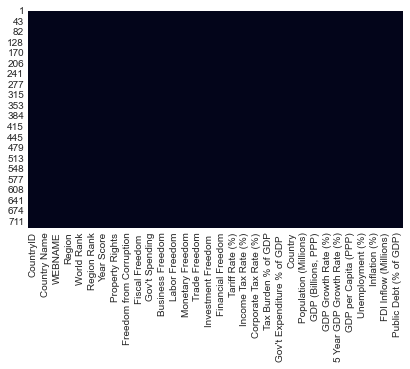

In [623]:
sns.heatmap(df.isnull(), cbar=False)

In [624]:
df.isnull().sum()

CountryID                      0
Country Name                   0
WEBNAME                        0
Region                         0
World Rank                     0
Region Rank                    0
Year Score                     0
Property Rights                0
Freedom from Corruption        0
Fiscal Freedom                 0
Gov't Spending                 0
Business Freedom               0
Labor Freedom                  0
Monetary Freedom               0
Trade Freedom                  0
Investment Freedom             0
Financial Freedom              0
Tariff Rate (%)                0
Income Tax Rate (%)            0
Corporate Tax Rate (%)         0
Tax Burden % of GDP            0
Gov't Expenditure % of GDP     0
Country                        0
Population (Millions)          0
GDP (Billions, PPP)            0
GDP Growth Rate (%)            0
5 Year GDP Growth Rate (%)     0
GDP per Capita (PPP)           0
Unemployment (%)               0
Inflation (%)                  0
FDI Inflow

In [625]:
df.dtypes

CountryID                        int64
Country Name                    object
WEBNAME                         object
Region                          object
World Rank                     float64
Region Rank                    float64
Year Score                     float64
Property Rights                float64
Freedom from Corruption        float64
Fiscal Freedom                 float64
Gov't Spending                 float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                 object
Income Tax Rate (%)            float64
Corporate Tax Rate (%)          object
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Country                         object
Population (Millions)          float64
GDP (Billions, PPP)             object
GDP Growth Rate (%)      

In [626]:
columnsToChange = ['FDI Inflow (Millions)','GDP per Capita (PPP)', 'GDP (Billions, PPP)', 'Unemployment (%)','Tariff Rate (%)','Corporate Tax Rate (%)','5 Year GDP Growth Rate (%)','GDP Growth Rate (%)']
for column in columnsToChange:
  data = df[column]
  edited = []
  for row in data:
    noComma = row.replace(',', '')
    noDollar = noComma.replace('$', '')
    edited.append(noDollar)
  df[column] = [x for x in edited]
  df[column] = df[column].astype(float)
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 1 to 732
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    599 non-null    int64  
 1   Country Name                 599 non-null    object 
 2   WEBNAME                      599 non-null    object 
 3   Region                       599 non-null    object 
 4   World Rank                   599 non-null    float64
 5   Region Rank                  599 non-null    float64
 6   Year Score                   599 non-null    float64
 7   Property Rights              599 non-null    float64
 8   Freedom from Corruption      599 non-null    float64
 9   Fiscal Freedom               599 non-null    float64
 10  Gov't Spending               599 non-null    float64
 11  Business Freedom             599 non-null    float64
 12  Labor Freedom                599 non-null    float64
 13  Monetary Freedom    

D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [627]:
#columns having object datype
list(df.select_dtypes(['object']).columns)

['Country Name', 'WEBNAME', 'Region', 'Country']

In [628]:
#df=df.drop(['Unnamed: 20','Unnamed: 24','Unnamed: 27'], axis=1)

In [629]:
list(df.select_dtypes(['object']).columns)

['Country Name', 'WEBNAME', 'Region', 'Country']

In [630]:
df['FDI Inflow (Millions)']

1       1031.4
2       2571.0
4       7243.1
5        524.6
6      41316.7
        ...   
726      751.4
728      320.0
729     9200.0
731     2483.8
732      544.8
Name: FDI Inflow (Millions), Length: 599, dtype: float64

In [631]:
df

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
1,2,Albania,Albania,Europe,58.0,27.0,65.2,30.0,31.0,92.6,...,Albania,3.2,24.9,2.0,4.4,7741.0,13.5,3.4,1031.4,58.9
2,3,Algeria,Algeria,Middle East / North Africa,145.0,14.0,49.6,30.0,29.0,80.4,...,Algeria,36.0,263.7,2.5,2.7,7333.0,10.0,4.5,2571.0,9.9
4,5,Argentina,Argentina,South and Central America / Caribbean,160.0,27.0,46.7,15.0,30.0,64.3,...,Argentina,40.9,716.4,8.9,6.8,17516.0,7.2,9.8,7243.1,44.2
5,6,Armenia,Armenia,Europe,38.0,17.0,69.4,30.0,26.0,88.0,...,Armenia,3.3,17.9,4.4,2.2,5384.0,5.9,7.7,524.6,35.1
6,7,Australia,Australia,Asia-Pacific,3.0,3.0,82.6,90.0,88.0,66.4,...,Australia,22.7,914.5,2.0,2.6,40234.0,5.1,3.4,41316.7,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,177,Uzbekistan,Uzbekistan,Asia-Pacific,166.0,39.0,46.0,15.0,18.0,90.4,...,Uzbekistan,30.6,171.7,8.1,8.2,5609.0,10.6,8.4,751.4,8.5
728,179,Venezuela,Venezuela,South and Central America / Caribbean,176.0,28.0,33.7,5.0,19.0,74.9,...,Venezuela,30.5,538.9,-4.0,1.1,17695.0,8.6,62.2,320.0,45.6
729,180,Vietnam,Vietnam,Asia-Pacific,131.0,27.0,54.0,15.0,31.0,79.3,...,Vietnam,90.6,510.7,6.0,5.9,5635.0,2.3,4.1,9200.0,58.7
731,182,Zambia,Zambia,Sub-Saharan Africa,106.0,16.0,58.8,30.0,38.0,73.3,...,Zambia,15.0,61.0,5.4,7.1,4064.0,13.3,7.9,2483.8,31.1


In [632]:
#renaming few columns
df.rename(columns={'Country Name': 'CountryName', 
                   'Judical Effectiveness': 'Judicial Effectiveness', 
                   'Gov\'t Spending': 'Gov Spending', 
                   'Gov\'t Expenditure % of GDP ': 'Gov Expenditure % of GDP',
                    'Investment Freedom ': 'Investment Freedom'}, inplace=True)

D:\Anaconda\envs\test_gpu\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [633]:
df

,CountryID,CountryName,WEBNAME,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
1,2,Albania,Albania,Europe,58.0,27.0,65.2,30.0,31.0,92.6,...,Albania,3.2,24.9,2.0,4.4,7741.0,13.5,3.4,1031.4,58.9
2,3,Algeria,Algeria,Middle East / North Africa,145.0,14.0,49.6,30.0,29.0,80.4,...,Algeria,36.0,263.7,2.5,2.7,7333.0,10.0,4.5,2571.0,9.9
4,5,Argentina,Argentina,South and Central America / Caribbean,160.0,27.0,46.7,15.0,30.0,64.3,...,Argentina,40.9,716.4,8.9,6.8,17516.0,7.2,9.8,7243.1,44.2
5,6,Armenia,Armenia,Europe,38.0,17.0,69.4,30.0,26.0,88.0,...,Armenia,3.3,17.9,4.4,2.2,5384.0,5.9,7.7,524.6,35.1
6,7,Australia,Australia,Asia-Pacific,3.0,3.0,82.6,90.0,88.0,66.4,...,Australia,22.7,914.5,2.0,2.6,40234.0,5.1,3.4,41316.7,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,177,Uzbekistan,Uzbekistan,Asia-Pacific,166.0,39.0,46.0,15.0,18.0,90.4,...,Uzbekistan,30.6,171.7,8.1,8.2,5609.0,10.6,8.4,751.4,8.5
728,179,Venezuela,Venezuela,South and Central America / Caribbean,176.0,28.0,33.7,5.0,19.0,74.9,...,Venezuela,30.5,538.9,-4.0,1.1,17695.0,8.6,62.2,320.0,45.6
729,180,Vietnam,Vietnam,Asia-Pacific,131.0,27.0,54.0,15.0,31.0,79.3,...,Vietnam,90.6,510.7,6.0,5.9,5635.0,2.3,4.1,9200.0,58.7
731,182,Zambia,Zambia,Sub-Saharan Africa,106.0,16.0,58.8,30.0,38.0,73.3,...,Zambia,15.0,61.0,5.4,7.1,4064.0,13.3,7.9,2483.8,31.1


In [634]:
df['World Rank'].max()

176.0

making a category column based on 2022 freedom index score (Thresholding)

In [635]:
bins = [0, 49.9, 59.9, 69.9, 79.9, 100]
names = ['Repressed', 'Mostly_unfree', 'moderately_free', 'mostly_free', 'free']

df['Score Category'] = pd.cut(df['Year Score'], bins, labels=names)

print(df.dtypes)

CountryID                        int64
CountryName                     object
WEBNAME                         object
Region                          object
World Rank                     float64
Region Rank                    float64
Year Score                     float64
Property Rights                float64
Freedom from Corruption        float64
Fiscal Freedom                 float64
Gov Spending                   float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov Expenditure % of GDP       float64
Country                         object
Population (Millions)          float64
GDP (Billions, PPP)            float64
GDP Growth Rate (%)      

D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [636]:
df['Score Category'].value_counts()

Mostly_unfree      198
moderately_free    194
mostly_free        114
Repressed           72
free                21
Name: Score Category, dtype: int64

In [637]:
df['Score Category']

1      moderately_free
2            Repressed
4            Repressed
5      moderately_free
6                 free
            ...       
726          Repressed
728          Repressed
729      Mostly_unfree
731      Mostly_unfree
732          Repressed
Name: Score Category, Length: 599, dtype: category
Categories (5, object): ['Repressed' < 'Mostly_unfree' < 'moderately_free' < 'mostly_free' < 'free']

In [638]:
df['Score Category'].isnull().sum()

0

In [639]:
df['Year Score'].max()

90.1

In [640]:
df

,CountryID,CountryName,WEBNAME,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category
1,2,Albania,Albania,Europe,58.0,27.0,65.2,30.0,31.0,92.6,...,3.2,24.9,2.0,4.4,7741.0,13.5,3.4,1031.4,58.9,moderately_free
2,3,Algeria,Algeria,Middle East / North Africa,145.0,14.0,49.6,30.0,29.0,80.4,...,36.0,263.7,2.5,2.7,7333.0,10.0,4.5,2571.0,9.9,Repressed
4,5,Argentina,Argentina,South and Central America / Caribbean,160.0,27.0,46.7,15.0,30.0,64.3,...,40.9,716.4,8.9,6.8,17516.0,7.2,9.8,7243.1,44.2,Repressed
5,6,Armenia,Armenia,Europe,38.0,17.0,69.4,30.0,26.0,88.0,...,3.3,17.9,4.4,2.2,5384.0,5.9,7.7,524.6,35.1,moderately_free
6,7,Australia,Australia,Asia-Pacific,3.0,3.0,82.6,90.0,88.0,66.4,...,22.7,914.5,2.0,2.6,40234.0,5.1,3.4,41316.7,22.9,free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,177,Uzbekistan,Uzbekistan,Asia-Pacific,166.0,39.0,46.0,15.0,18.0,90.4,...,30.6,171.7,8.1,8.2,5609.0,10.6,8.4,751.4,8.5,Repressed
728,179,Venezuela,Venezuela,South and Central America / Caribbean,176.0,28.0,33.7,5.0,19.0,74.9,...,30.5,538.9,-4.0,1.1,17695.0,8.6,62.2,320.0,45.6,Repressed
729,180,Vietnam,Vietnam,Asia-Pacific,131.0,27.0,54.0,15.0,31.0,79.3,...,90.6,510.7,6.0,5.9,5635.0,2.3,4.1,9200.0,58.7,Mostly_unfree
731,182,Zambia,Zambia,Sub-Saharan Africa,106.0,16.0,58.8,30.0,38.0,73.3,...,15.0,61.0,5.4,7.1,4064.0,13.3,7.9,2483.8,31.1,Mostly_unfree


In [641]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

CountryID : [  2   3   5   6   7   8   9  10  11  12  13  15  16  18  19  20  21  22
  23  25  27  29  30  33  34  35  39  41  43  44  45  47  48  49  50  51
  52  54  57  58  61  62  64  65  68  69  70  71  72  73  74  75  76  78
  79  80  81  82  83  84  85  88  90  91  92  98  99 101 104 105 107 108
 109 110 112 113 114 115 117 118 119 120 121 123 124 126 127 128 129 130
 131 132 133 134 135 136 142 143 144 145 147 148 149 151 152 153 155 156
 157 158 160 161 163 164 167 168 169 172 173 174 175 176 177 179 180 182
 183  14 186  24  28  31  36  38  46  56  59  63  89  94  95 106 116 125
 138 139 141 170 178 181   4  17  26  32  37  40  53  55  60  66  67  93
 103 122 137 146 150 162 165 171 102]
CountryName : ['Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belgium'
 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burma' 'Cambodia' 'Canada' 'Cape Verde' 'Chile' 'China

In [642]:
categorical_val

['Region', 'Financial Freedom', 'Score Category']

In [643]:
df['GDP per Capita (PPP)'].unique()

array([  7741.,   7333.,  17516.,   5384.,  40234.,  41822.,  10202.,
        30959.,  27556.,   1693.,  23417.,  37737.,   8264.,   6112.,
         4789.,   8133.,  16030.,  11769.,  13597.,   1325.,   2216.,
        40541.,   3947.,  17222.,   8382.,  10249.,  11927.,  18192.,
        29074.,  27062.,  37152.,  13816.,   9287.,   8492.,   6540.,
         7550.,  19356.,  20380.,  36236.,  35156.,   5491.,  37897.,
        26294.,   5070.,   7466.,   1235.,   4345.,  49137.,  19591.,
        38061.,   3694.,   4666.,  13053.,  39639.,  30975.,  30464.,
         9029.,  34740.,   5900.,  13001.,   1746.,  31714.,   2372.,
         2659.,  15662.,  18856.,  80119.,  10367.,  15568.,   8731.,
        25428.,   2179.,  14954.,  14610.,   3373.,   4744.,  11545.,
         5052.,   7363.,   1328.,  42183.,  27668.,   3206.,   2578.,
        53471.,   2787.,  14097.,   2532.,   5413.,  10062.,   4073.,
        20334.,  23361., 102943.,  12476.,  16736.,  24237.,   1871.,
        10642.,  247

In [644]:
continous_val

['CountryID',
 'CountryName',
 'WEBNAME',
 'World Rank',
 'Region Rank',
 'Year Score',
 'Property Rights',
 'Freedom from Corruption',
 'Fiscal Freedom ',
 'Gov Spending',
 'Business Freedom',
 'Labor Freedom',
 'Monetary Freedom',
 'Trade Freedom',
 'Investment Freedom',
 'Tariff Rate (%)',
 'Income Tax Rate (%)',
 'Corporate Tax Rate (%)',
 'Tax Burden % of GDP',
 'Gov Expenditure % of GDP',
 'Country',
 'Population (Millions)',
 'GDP (Billions, PPP)',
 'GDP Growth Rate (%)',
 '5 Year GDP Growth Rate (%)',
 'GDP per Capita (PPP)',
 'Unemployment (%)',
 'Inflation (%)',
 'FDI Inflow (Millions)',
 'Public Debt (% of GDP)']

In [645]:
for i in ['CountryID','CountryName','WEBNAME']:
    categorical_val.append(i)

In [646]:
categorical_val

['Region',
 'Financial Freedom',
 'Score Category',
 'CountryID',
 'CountryName',
 'WEBNAME']

In [647]:
for i in ['CountryID','CountryName','WEBNAME']:
    continous_val.remove(i)

In [648]:
continous_val

['World Rank',
 'Region Rank',
 'Year Score',
 'Property Rights',
 'Freedom from Corruption',
 'Fiscal Freedom ',
 'Gov Spending',
 'Business Freedom',
 'Labor Freedom',
 'Monetary Freedom',
 'Trade Freedom',
 'Investment Freedom',
 'Tariff Rate (%)',
 'Income Tax Rate (%)',
 'Corporate Tax Rate (%)',
 'Tax Burden % of GDP',
 'Gov Expenditure % of GDP',
 'Country',
 'Population (Millions)',
 'GDP (Billions, PPP)',
 'GDP Growth Rate (%)',
 '5 Year GDP Growth Rate (%)',
 'GDP per Capita (PPP)',
 'Unemployment (%)',
 'Inflation (%)',
 'FDI Inflow (Millions)',
 'Public Debt (% of GDP)']

In [649]:
df['Score Category'].unique()

['moderately_free', 'Repressed', 'free', 'mostly_free', 'Mostly_unfree']
Categories (5, object): ['Repressed' < 'Mostly_unfree' < 'moderately_free' < 'mostly_free' < 'free']

In [650]:
from sklearn.preprocessing import LabelEncoder

In [651]:
le = LabelEncoder()
le.fit_transform

<bound method LabelEncoder.fit_transform of LabelEncoder()>

In [652]:
category_map = {'free':1,
               'mostly_free':2,
               'moderately_free':3,
               'Mostly_unfree':4,
               'Repressed':5
}

df['Score Category'] = df['Score Category'].map(category_map)

D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [653]:
df['Score Category']

1      3
2      5
4      5
5      3
6      1
      ..
726    5
728    5
729    4
731    4
732    5
Name: Score Category, Length: 599, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

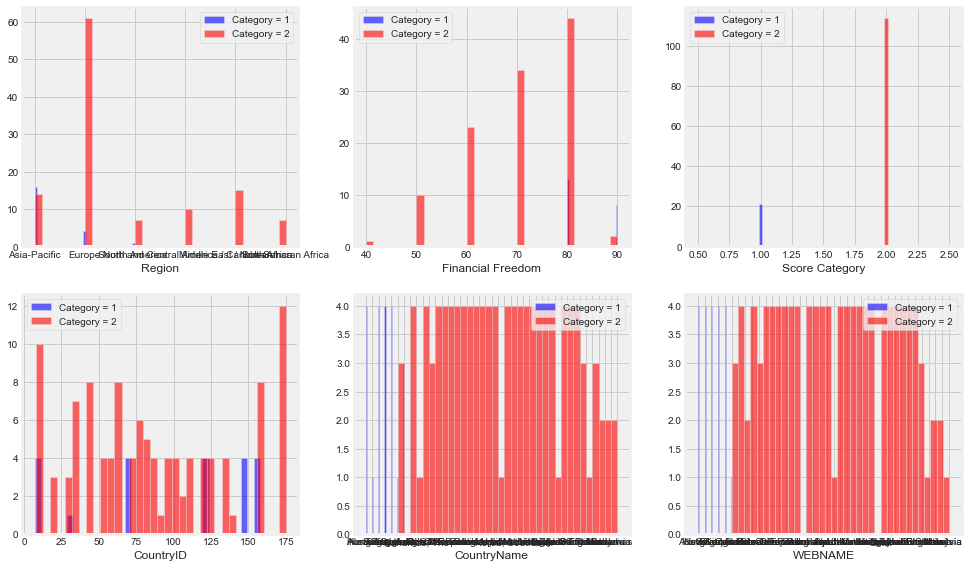

In [654]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["Score Category"] == 1][column].hist(bins=35, color='blue', label='Category = 1', alpha=0.6)
    df[df["Score Category"] == 2][column].hist(bins=35, color='red', label='Category = 2', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [655]:
df.head()

,CountryID,CountryName,WEBNAME,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category
1,2,Albania,Albania,Europe,58.0,27.0,65.2,30.0,31.0,92.6,...,3.2,24.9,2.0,4.4,7741.0,13.5,3.4,1031.4,58.9,3
2,3,Algeria,Algeria,Middle East / North Africa,145.0,14.0,49.6,30.0,29.0,80.4,...,36.0,263.7,2.5,2.7,7333.0,10.0,4.5,2571.0,9.9,5
4,5,Argentina,Argentina,South and Central America / Caribbean,160.0,27.0,46.7,15.0,30.0,64.3,...,40.9,716.4,8.9,6.8,17516.0,7.2,9.8,7243.1,44.2,5
5,6,Armenia,Armenia,Europe,38.0,17.0,69.4,30.0,26.0,88.0,...,3.3,17.9,4.4,2.2,5384.0,5.9,7.7,524.6,35.1,3
6,7,Australia,Australia,Asia-Pacific,3.0,3.0,82.6,90.0,88.0,66.4,...,22.7,914.5,2.0,2.6,40234.0,5.1,3.4,41316.7,22.9,1


In [656]:
df=df.drop(['CountryID','CountryName','WEBNAME'], axis=1)

In [657]:
df.columns

Index(['Region', 'World Rank', 'Region Rank', 'Year Score', 'Property Rights',
       'Freedom from Corruption', 'Fiscal Freedom ', 'Gov Spending',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov Expenditure % of GDP', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Score Category'],
      dtype='object')

In [658]:
df['Region'] = df['Region'].astype('category')

In [659]:
df=df.drop('Country', axis=1)

In [660]:
df.dtypes

Region                        category
World Rank                     float64
Region Rank                    float64
Year Score                     float64
Property Rights                float64
Freedom from Corruption        float64
Fiscal Freedom                 float64
Gov Spending                   float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov Expenditure % of GDP       float64
Population (Millions)          float64
GDP (Billions, PPP)            float64
GDP Growth Rate (%)            float64
5 Year GDP Growth Rate (%)     float64
GDP per Capita (PPP)           float64
Unemployment (%)               float64
Inflation (%)            

In [661]:
dummies = pd.get_dummies(df['Region'])
dummies

,Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
1,0,1,0,0,0,0
2,0,0,1,0,0,0
4,0,0,0,0,1,0
5,0,1,0,0,0,0
6,1,0,0,0,0,0
...,...,...,...,...,...,...
726,1,0,0,0,0,0
728,0,0,0,0,1,0
729,1,0,0,0,0,0
731,0,0,0,0,0,1


In [662]:
merged = pd.concat([df,dummies],axis='columns')
merged

,Region,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov Spending,Business Freedom,Labor Freedom,...,Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category,Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
1,Europe,58.0,27.0,65.2,30.0,31.0,92.6,75.1,81.0,49.0,...,3.4,1031.4,58.9,3,0,1,0,0,0,0
2,Middle East / North Africa,145.0,14.0,49.6,30.0,29.0,80.4,44.1,65.2,52.6,...,4.5,2571.0,9.9,5,0,0,1,0,0,0
4,South and Central America / Caribbean,160.0,27.0,46.7,15.0,30.0,64.3,52.1,60.1,47.4,...,9.8,7243.1,44.2,5,0,0,0,0,1,0
5,Europe,38.0,17.0,69.4,30.0,26.0,88.0,82.1,87.6,77.1,...,7.7,524.6,35.1,3,0,1,0,0,0,0
6,Asia-Pacific,3.0,3.0,82.6,90.0,88.0,66.4,62.8,95.5,83.5,...,3.4,41316.7,22.9,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Asia-Pacific,166.0,39.0,46.0,15.0,18.0,90.4,66.6,67.1,61.9,...,8.4,751.4,8.5,5,1,0,0,0,0,0
728,South and Central America / Caribbean,176.0,28.0,33.7,5.0,19.0,74.9,56.7,45.3,29.5,...,62.2,320.0,45.6,5,0,0,0,0,1,0
729,Asia-Pacific,131.0,27.0,54.0,15.0,31.0,79.3,75.1,58.3,62.6,...,4.1,9200.0,58.7,4,1,0,0,0,0,0
731,Sub-Saharan Africa,106.0,16.0,58.8,30.0,38.0,73.3,81.1,66.4,48.3,...,7.9,2483.8,31.1,4,0,0,0,0,0,1


In [663]:
final = merged.drop(["Region"],axis='columns')
final

,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov Spending,Business Freedom,Labor Freedom,Monetary Freedom,...,Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category,Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
1,58.0,27.0,65.2,30.0,31.0,92.6,75.1,81.0,49.0,78.4,...,3.4,1031.4,58.9,3,0,1,0,0,0,0
2,145.0,14.0,49.6,30.0,29.0,80.4,44.1,65.2,52.6,76.6,...,4.5,2571.0,9.9,5,0,0,1,0,0,0
4,160.0,27.0,46.7,15.0,30.0,64.3,52.1,60.1,47.4,60.4,...,9.8,7243.1,44.2,5,0,0,0,0,1,0
5,38.0,17.0,69.4,30.0,26.0,88.0,82.1,87.6,77.1,73.0,...,7.7,524.6,35.1,3,0,1,0,0,0,0
6,3.0,3.0,82.6,90.0,88.0,66.4,62.8,95.5,83.5,83.8,...,3.4,41316.7,22.9,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,166.0,39.0,46.0,15.0,18.0,90.4,66.6,67.1,61.9,65.6,...,8.4,751.4,8.5,5,1,0,0,0,0,0
728,176.0,28.0,33.7,5.0,19.0,74.9,56.7,45.3,29.5,33.8,...,62.2,320.0,45.6,5,0,0,0,0,1,0
729,131.0,27.0,54.0,15.0,31.0,79.3,75.1,58.3,62.6,70.6,...,4.1,9200.0,58.7,4,1,0,0,0,0,0
731,106.0,16.0,58.8,30.0,38.0,73.3,81.1,66.4,48.3,72.6,...,7.9,2483.8,31.1,4,0,0,0,0,0,1


In [664]:
df=final
df.head(3)

,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov Spending,Business Freedom,Labor Freedom,Monetary Freedom,...,Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category,Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
1,58.0,27.0,65.2,30.0,31.0,92.6,75.1,81.0,49.0,78.4,...,3.4,1031.4,58.9,3,0,1,0,0,0,0
2,145.0,14.0,49.6,30.0,29.0,80.4,44.1,65.2,52.6,76.6,...,4.5,2571.0,9.9,5,0,0,1,0,0,0
4,160.0,27.0,46.7,15.0,30.0,64.3,52.1,60.1,47.4,60.4,...,9.8,7243.1,44.2,5,0,0,0,0,1,0


In [665]:
X=df.drop(['World Rank','Region Rank','Score Category'], axis=1)
y=df['Score Category']

In [666]:
y

1      3
2      5
4      5
5      3
6      1
      ..
726    5
728    5
729    4
731    4
732    5
Name: Score Category, Length: 599, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [667]:
X.dtypes

Year Score                               float64
Property Rights                          float64
Freedom from Corruption                  float64
Fiscal Freedom                           float64
Gov Spending                             float64
Business Freedom                         float64
Labor Freedom                            float64
Monetary Freedom                         float64
Trade Freedom                            float64
Investment Freedom                       float64
Financial Freedom                        float64
Tariff Rate (%)                          float64
Income Tax Rate (%)                      float64
Corporate Tax Rate (%)                   float64
Tax Burden % of GDP                      float64
Gov Expenditure % of GDP                 float64
Population (Millions)                    float64
GDP (Billions, PPP)                      float64
GDP Growth Rate (%)                      float64
5 Year GDP Growth Rate (%)               float64
GDP per Capita (PPP)

In [668]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [669]:
y.dtypes

CategoricalDtype(categories=[5, 4, 3, 2, 1], ordered=True)

In [670]:
y.value_counts()

1    198
2    198
3    198
4    198
5    198
Name: Score Category, dtype: int64

<AxesSubplot:>

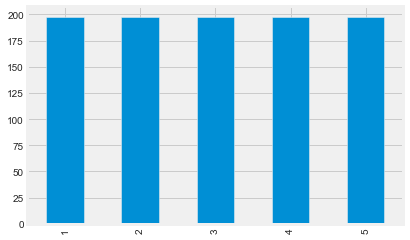

In [671]:
y.value_counts().plot(kind="bar")

In [672]:
X.shape

(990, 31)

In [673]:
y.shape

(990,)

In [674]:
#X=X.drop('Region', axis=1)

In [675]:
#from sklearn.feature_selection import chi2
#f_p_values=chi2(X,y)

In [676]:
X.columns[(X < 0).any()]

Index(['GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'Inflation (%)',
       'FDI Inflow (Millions)'],
      dtype='object')

In [677]:
X2=X.copy()

In [678]:
X2=X2.drop(['GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'Inflation (%)','FDI Inflow (Millions)'], axis=1)
X2.head()

,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov Spending,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,...,"GDP (Billions, PPP)",GDP per Capita (PPP),Unemployment (%),Public Debt (% of GDP),Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
0,65.2,30.0,31.0,92.6,75.1,81.0,49.0,78.4,79.8,65.0,...,24.9,7741.0,13.5,58.9,0,1,0,0,0,0
1,49.6,30.0,29.0,80.4,44.1,65.2,52.6,76.6,67.8,20.0,...,263.7,7333.0,10.0,9.9,0,0,1,0,0,0
2,46.7,15.0,30.0,64.3,52.1,60.1,47.4,60.4,67.6,40.0,...,716.4,17516.0,7.2,44.2,0,0,0,0,1,0
3,69.4,30.0,26.0,88.0,82.1,87.6,77.1,73.0,85.4,75.0,...,17.9,5384.0,5.9,35.1,0,1,0,0,0,0
4,82.6,90.0,88.0,66.4,62.8,95.5,83.5,83.8,86.2,80.0,...,914.5,40234.0,5.1,22.9,1,0,0,0,0,0


In [679]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X2,y)

In [680]:
f_p_values

(array([2.81737223e+03, 1.53159332e+04, 1.08785232e+04, 5.45470749e+01,
        7.43223527e+02, 3.52408209e+03, 2.42513704e+03, 4.58531527e+02,
        9.55228128e+02, 8.55001038e+03, 7.61231632e+03, 2.16810732e+03,
        1.39076102e+02, 4.04042360e+02, 4.62448606e+02, 3.52540306e+02,
        2.20138288e+04, 1.90271212e+05, 1.14528897e+07, 8.82314931e+02,
        1.23831492e+03, 1.38795276e+02, 1.44078603e+02, 1.89677419e+01,
        2.71250000e+01, 5.61525424e+01, 1.23813665e+02]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.04234452e-011,
        1.52166196e-159, 0.00000000e+000, 0.00000000e+000, 6.21403017e-098,
        1.79817883e-205, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        4.45073352e-029, 3.72269629e-086, 8.84033475e-099, 4.95999030e-075,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.13063915e-189,
        7.86746146e-267, 5.11148317e-029, 3.77820546e-030, 7.97496597e-004,
        1.87549982e-005, 1.86281215e-011, 8.18280416e-

In [681]:
p_values=pd.Series(f_p_values[1])
p_values.index=X2.columns
p_values
#p value should be lower and f score should be higher 

Year Score                                0.000000e+00
Property Rights                           0.000000e+00
Freedom from Corruption                   0.000000e+00
Fiscal Freedom                            4.042345e-11
Gov Spending                             1.521662e-159
Business Freedom                          0.000000e+00
Labor Freedom                             0.000000e+00
Monetary Freedom                          6.214030e-98
Trade Freedom                            1.798179e-205
Investment Freedom                        0.000000e+00
Financial Freedom                         0.000000e+00
Tariff Rate (%)                           0.000000e+00
Income Tax Rate (%)                       4.450734e-29
Corporate Tax Rate (%)                    3.722696e-86
Tax Burden % of GDP                       8.840335e-99
Gov Expenditure % of GDP                  4.959990e-75
Population (Millions)                     0.000000e+00
GDP (Billions, PPP)                       0.000000e+00
GDP per Ca

In [682]:
p_values.sort_index(ascending=False)

Year Score                                0.000000e+00
Unemployment (%)                         1.130639e-189
Trade Freedom                            1.798179e-205
Tax Burden % of GDP                       8.840335e-99
Tariff Rate (%)                           0.000000e+00
Sub-Saharan Africa                        8.182804e-26
South and Central America / Caribbean     1.862812e-11
Public Debt (% of GDP)                   7.867461e-267
Property Rights                           0.000000e+00
Population (Millions)                     0.000000e+00
North America                             1.875500e-05
Monetary Freedom                          6.214030e-98
Middle East / North Africa                7.974966e-04
Labor Freedom                             0.000000e+00
Investment Freedom                        0.000000e+00
Income Tax Rate (%)                       4.450734e-29
Gov Spending                             1.521662e-159
Gov Expenditure % of GDP                  4.959990e-75
GDP per Ca

<AxesSubplot:xlabel='value', ylabel='variable'>

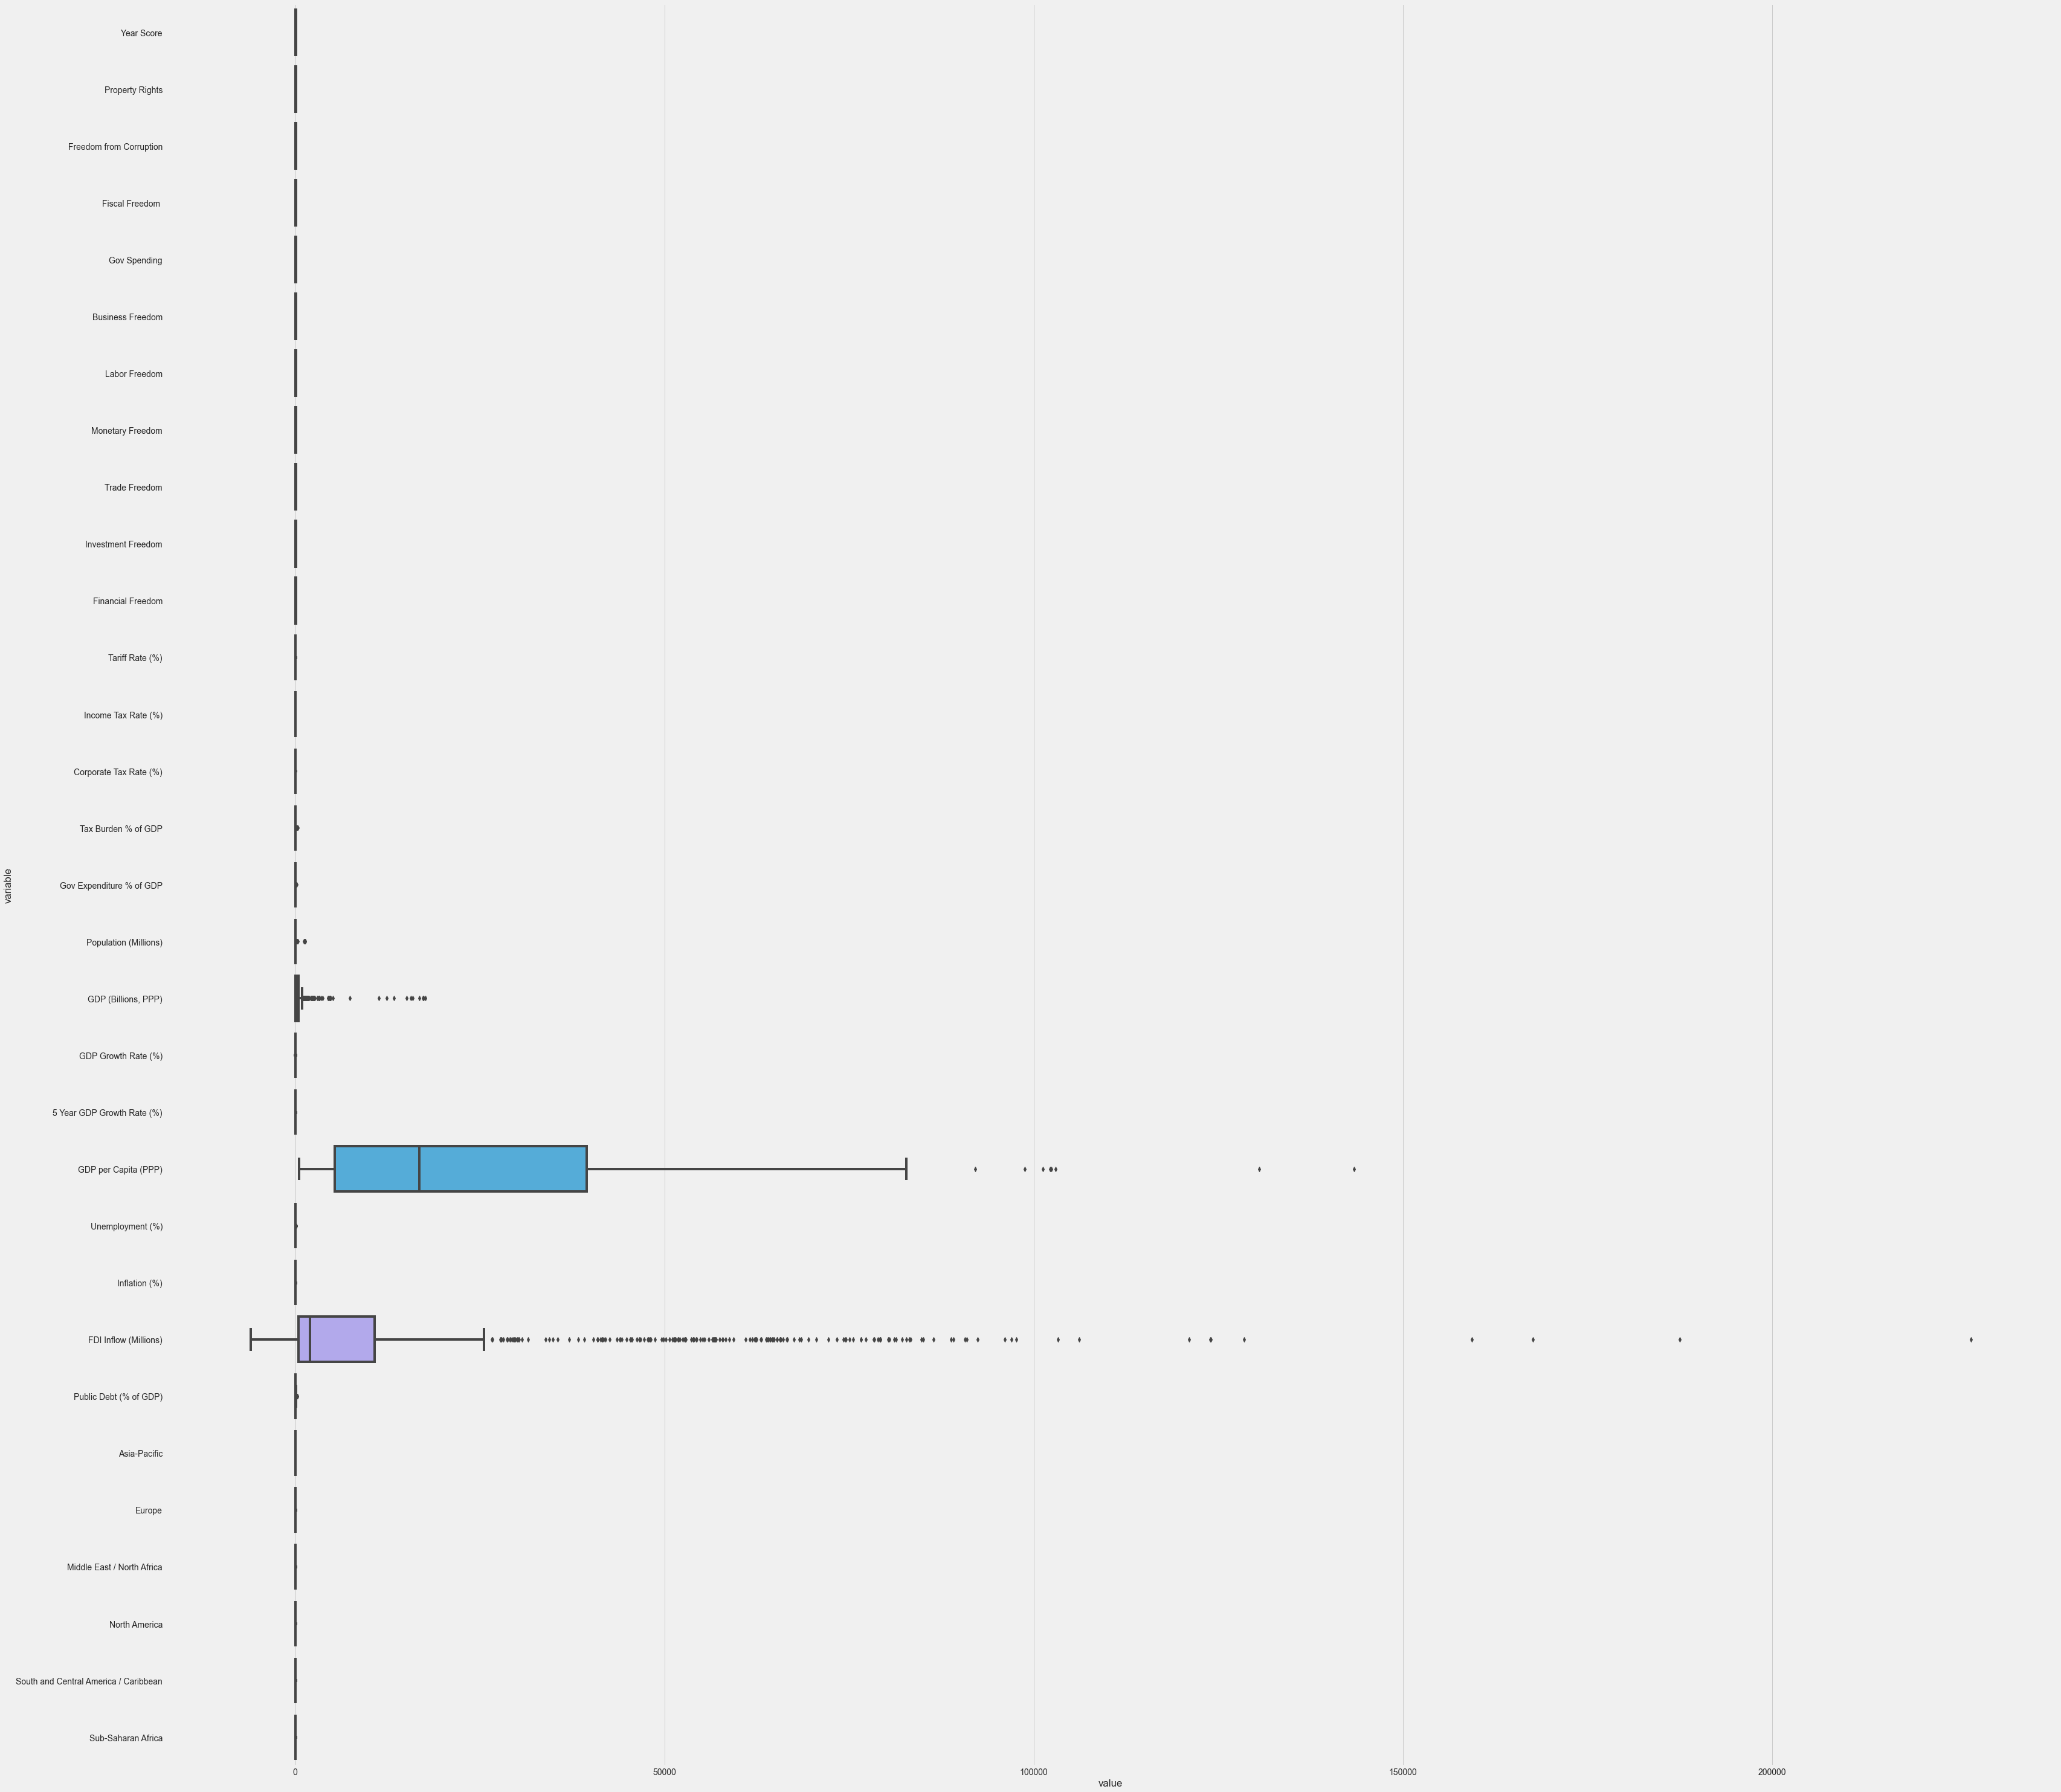

In [683]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")  #adding style to our plots
plt.figure(figsize=(50, 50))
sns.boxplot(x="value", y="variable", data=pd.melt(X))

<AxesSubplot:xlabel='variable', ylabel='value'>

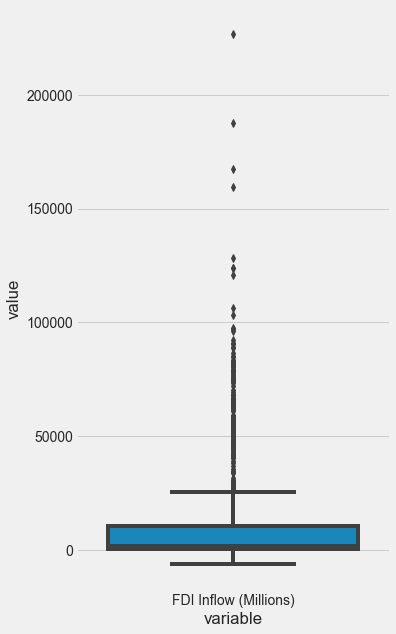

In [684]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['FDI Inflow (Millions)']]))

In [685]:
scaler = StandardScaler()
X[['FDI Inflow (Millions)']] = scaler.fit_transform(X[['FDI Inflow (Millions)']])

<AxesSubplot:xlabel='variable', ylabel='value'>

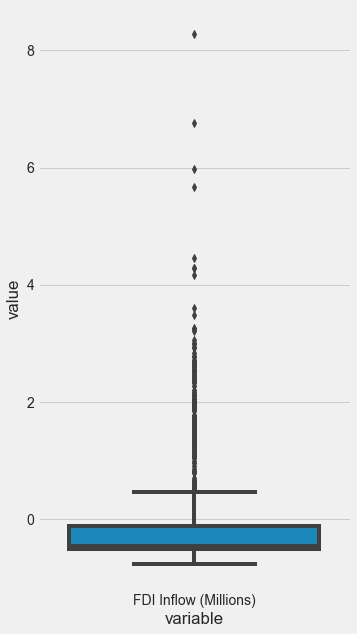

In [686]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['FDI Inflow (Millions)']]))

<AxesSubplot:xlabel='variable', ylabel='value'>

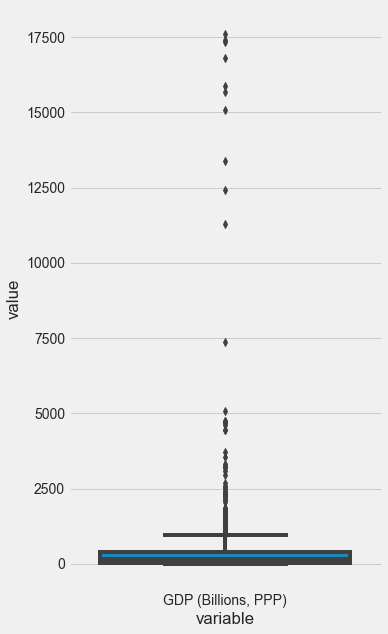

In [687]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['GDP (Billions, PPP)']]))

In [688]:
X['GDP (Billions, PPP)'] = np.log2(X['GDP (Billions, PPP)'])

<AxesSubplot:xlabel='variable', ylabel='value'>

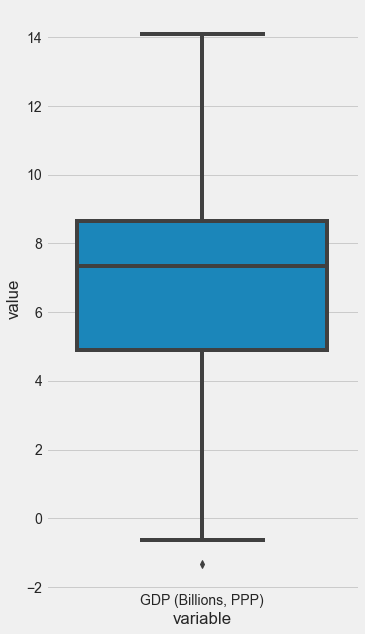

In [689]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['GDP (Billions, PPP)']]))

In [690]:
X.columns

Index(['Year Score', 'Property Rights', 'Freedom from Corruption',
       'Fiscal Freedom ', 'Gov Spending', 'Business Freedom', 'Labor Freedom',
       'Monetary Freedom', 'Trade Freedom', 'Investment Freedom',
       'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)',
       'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov Expenditure % of GDP', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Asia-Pacific', 'Europe',
       'Middle East / North Africa', 'North America',
       'South and Central America / Caribbean', 'Sub-Saharan Africa'],
      dtype='object')

<AxesSubplot:>

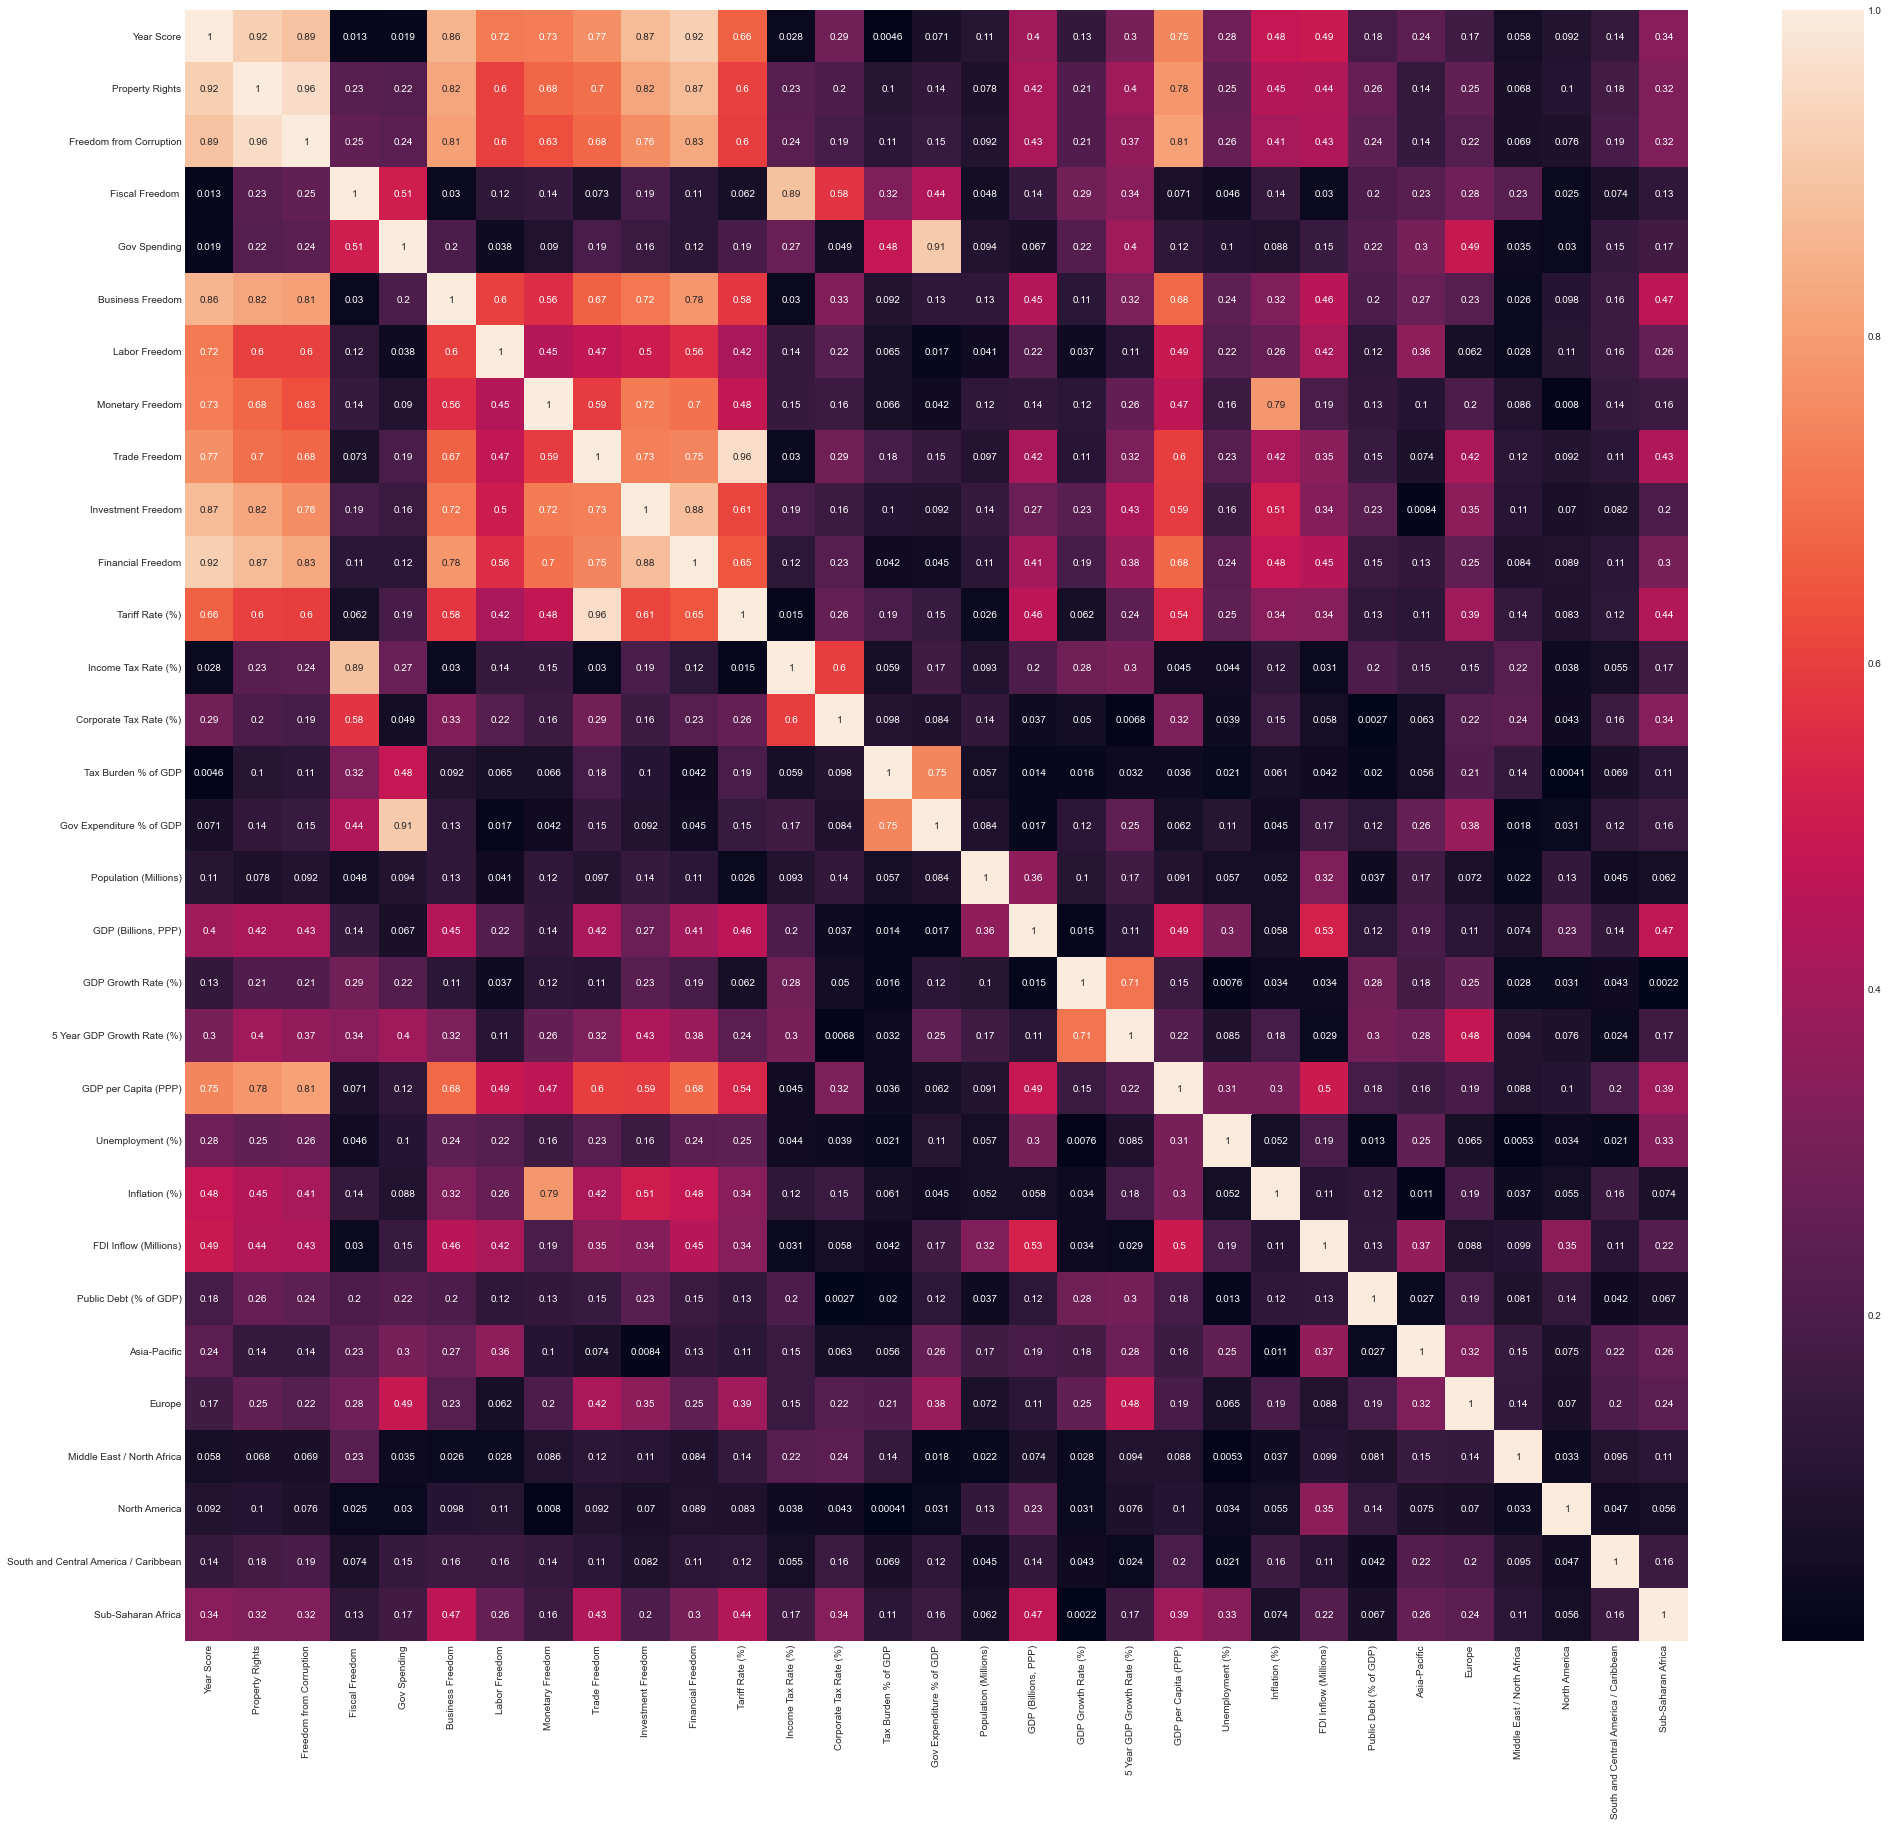

In [691]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30, 30))
sns.heatmap(X.corr().abs(),  annot=True)

In [692]:
X=X.drop(['Financial Freedom','Investment Freedom','Year Score','GDP per Capita (PPP)','GDP (Billions, PPP)','Tariff Rate (%)'], axis=1)

In [693]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [694]:
corr_features = correlation(X, 0.60)
len(set(corr_features))

9

In [695]:
corr_features

{'5 Year GDP Growth Rate (%)',
 'Business Freedom',
 'Freedom from Corruption',
 'Gov Expenditure % of GDP',
 'Income Tax Rate (%)',
 'Inflation (%)',
 'Labor Freedom',
 'Monetary Freedom',
 'Trade Freedom'}

In [696]:
X=X.drop(corr_features,axis=1)   #removing the features

In [697]:
X.shape

(990, 16)

<AxesSubplot:>

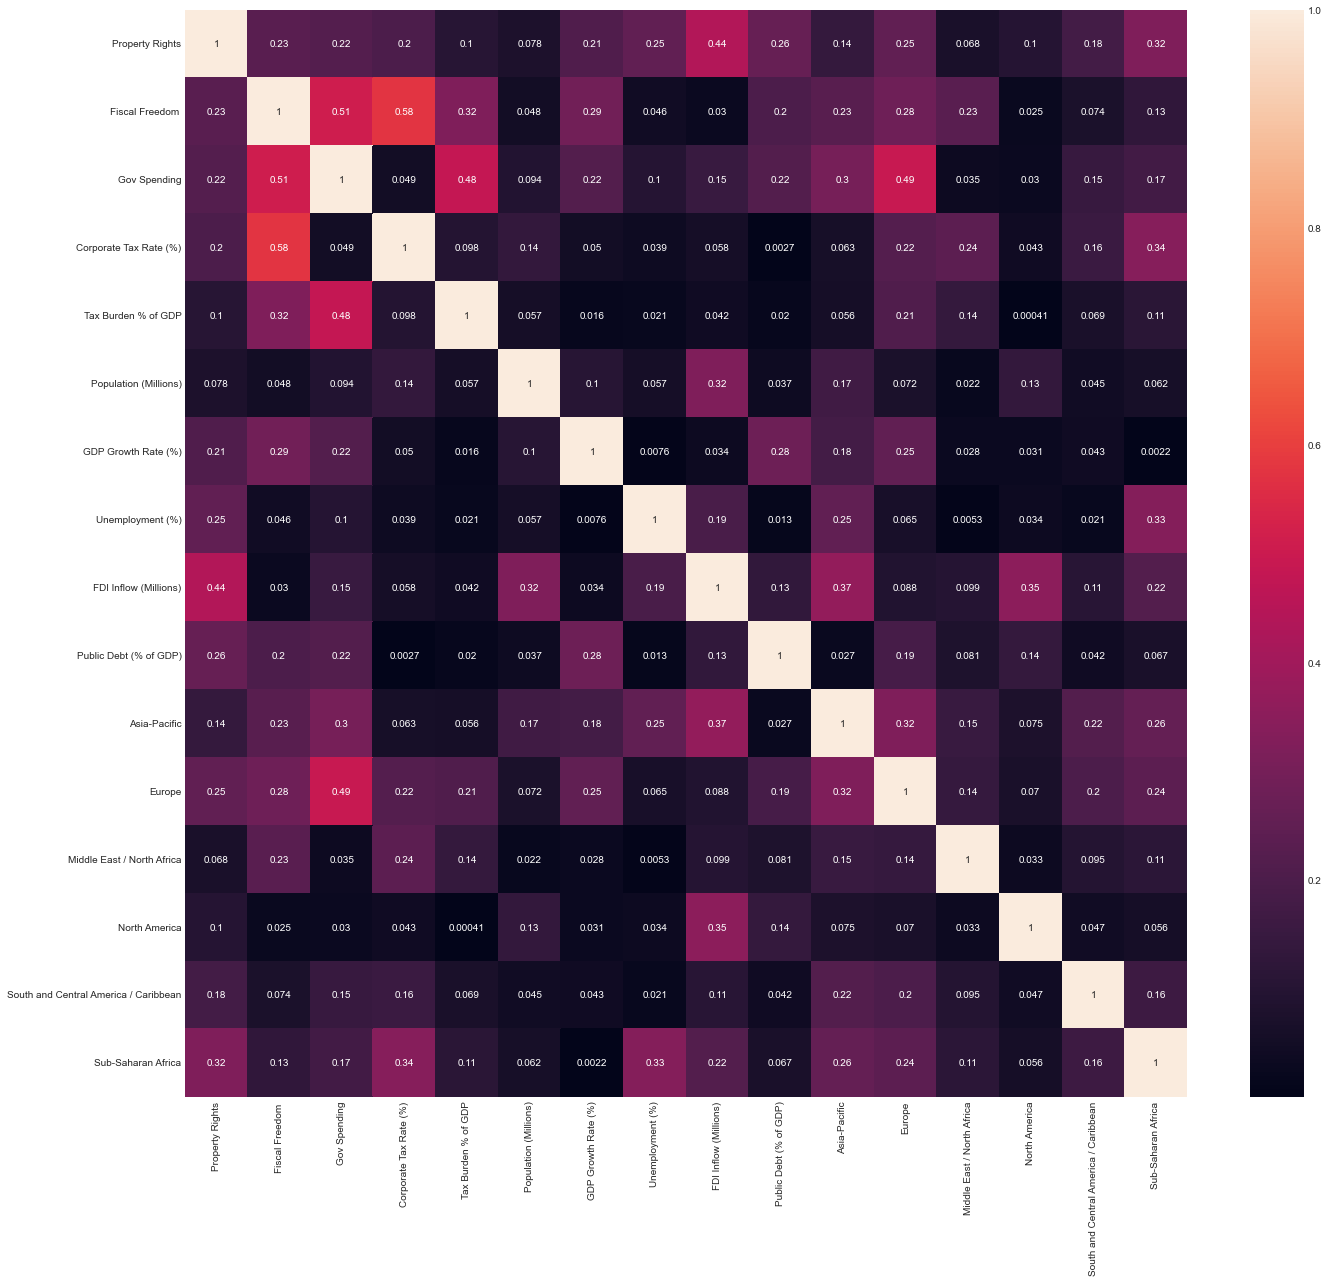

In [698]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 20))
sns.heatmap(X.corr().abs(),  annot=True)

<AxesSubplot:title={'center':'Correlation with target'}>

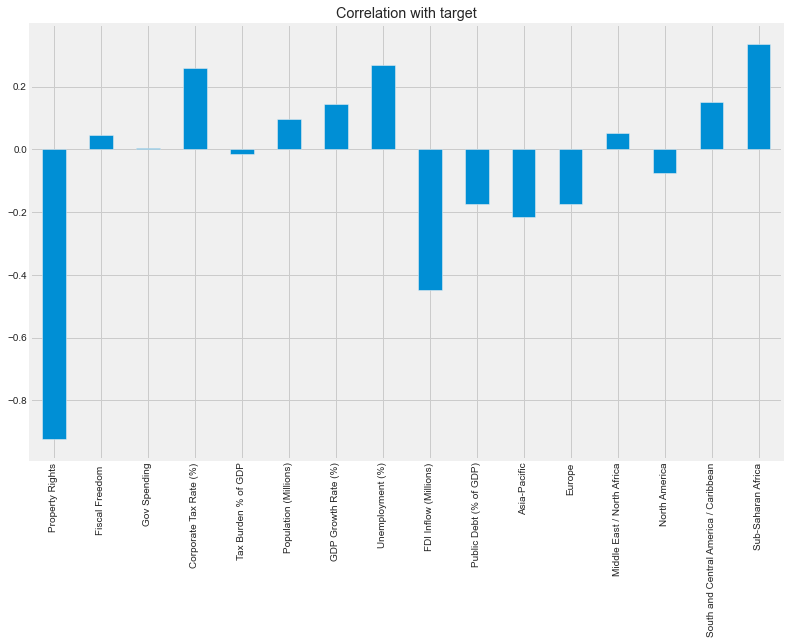

In [699]:
X.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [700]:
X=X.fillna(X.mean())

In [701]:
X.isnull().sum()

Property Rights                          0
Fiscal Freedom                           0
Gov Spending                             0
Corporate Tax Rate (%)                   0
Tax Burden % of GDP                      0
Population (Millions)                    0
GDP Growth Rate (%)                      0
Unemployment (%)                         0
FDI Inflow (Millions)                    0
Public Debt (% of GDP)                   0
Asia-Pacific                             0
Europe                                   0
Middle East / North Africa               0
North America                            0
South and Central America / Caribbean    0
Sub-Saharan Africa                       0
dtype: int64

In [702]:
X.head()

,Property Rights,Fiscal Freedom,Gov Spending,Corporate Tax Rate (%),Tax Burden % of GDP,Population (Millions),GDP Growth Rate (%),Unemployment (%),FDI Inflow (Millions),Public Debt (% of GDP),Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
0,30.0,92.6,75.1,10.0,23.3,3.2,2.0,13.5,-0.485365,58.9,0,1,0,0,0,0
1,30.0,80.4,44.1,25.0,10.4,36.0,2.5,10.0,-0.425597,9.9,0,0,1,0,0,0
2,15.0,64.3,52.1,35.0,33.5,40.9,8.9,7.2,-0.244225,44.2,0,0,0,0,1,0
3,30.0,88.0,82.1,20.0,20.0,3.3,4.4,5.9,-0.505039,35.1,0,1,0,0,0,0
4,90.0,66.4,62.8,30.0,20.9,22.7,2.0,5.1,1.078523,22.9,1,0,0,0,0,0


In [703]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=100)

In [704]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [705]:
y_train.head()

,Score Category
616,1
151,4
341,4
396,2
271,4


In [706]:
y_test.head()

,Score Category
200,3
329,3
914,5
175,3
225,4


# Logistic Regression

In [707]:
model = LogisticRegression()

In [708]:
model.fit(X_train, y_train)

D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [709]:
y_pred = model.predict(X_test)

In [710]:
# Print Accuracy on testing set
test_accuracy_sklearn = accuracy_score(y_test, y_pred)

print(f"\nAccuracy on testing set with scaling: {test_accuracy_sklearn}")


Accuracy on testing set with scaling: 0.7727272727272727


In [711]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report
#report=pd.DataFrame(eval(report))

'              precision    recall  f1-score   support\n\n           1       0.87      0.94      0.90        79\n           2       0.70      0.72      0.71        67\n           3       0.75      0.62      0.68        94\n           4       0.70      0.77      0.73        86\n           5       0.85      0.86      0.85        70\n\n    accuracy                           0.77       396\n   macro avg       0.77      0.78      0.77       396\nweighted avg       0.77      0.77      0.77       396\n'

In [712]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
#sns.heatmap(cm, annot=True)

array([[74,  5,  0,  0,  0],
       [10, 48,  9,  0,  0],
       [ 1, 15, 58, 18,  2],
       [ 0,  1, 10, 66,  9],
       [ 0,  0,  0, 10, 60]], dtype=int64)

In [713]:
from sklearn.metrics import precision_recall_fscore_support
score=precision_recall_fscore_support(y_test,y_pred)
score

(array([0.87058824, 0.69565217, 0.75324675, 0.70212766, 0.84507042]),
 array([0.93670886, 0.71641791, 0.61702128, 0.76744186, 0.85714286]),
 array([0.90243902, 0.70588235, 0.67836257, 0.73333333, 0.85106383]),
 array([79, 67, 94, 86, 70], dtype=int64))

In [714]:
#false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)

# Decision Tree Classifier

In [715]:
from sklearn.tree import DecisionTreeClassifier

In [716]:
model2 = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_leaf=1, max_depth=8, min_samples_split=2)

In [717]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

In [718]:
y_pred = model2.predict(X_test)

In [719]:
# Print Accuracy on testing set
test_accuracy_sklearn = accuracy_score(y_test, y_pred)

print(f"\nAccuracy on testing set with scaling: {test_accuracy_sklearn}")


Accuracy on testing set with scaling: 0.8383838383838383


In [720]:
predict_train_dtc = model2.predict(X_train)
predict_test_dtc = model2.predict(X_test)
print('Training Accuracy:', accuracy_score(y_train, predict_train_dtc))
print('Validation Accuracy:', accuracy_score(y_test, predict_test_dtc))

Training Accuracy: 0.9696969696969697
Validation Accuracy: 0.8383838383838383


In [721]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [722]:
paramgrid = {
    'max_depth': list(range(2, 10, 2)),
    'criterion': ["gini", "entropy"]
}
grid_search=GridSearchCV(DecisionTreeClassifier(),paramgrid)

In [723]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [724]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=8)

In [725]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [726]:
grid_search.best_score_

0.8333000997008974

# Random Forest Classifier

In [727]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier()
model3 = model3.fit(X_train, y_train)
predict_train_rf = model3.predict(X_train)
predict_test_rf = model3.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', accuracy_score(y_test, predict_test_rf))

Rf_score_before=accuracy_score(y_test, predict_test_rf)

Training Accuracy: 1.0
Validation Accuracy: 0.9343434343434344


D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


# Support Vector Machine

In [728]:
from sklearn.model_selection import GridSearchCV
model4 = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],                         #inside the dictionary we can define every possible parameter values
    'kernel': ['rbf','linear']              #the dictionary inside is what we call parameter grid
}, cv=5, return_train_score=False)
model4.fit(X_train, y_train)
model4.cv_results_        #cv_results_ is the dictionary

D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

{'mean_fit_time': array([0.01560326, 0.25912461, 0.01540394, 1.89753022, 0.01530504,
        3.68414283]),
 'std_fit_time': array([4.90232370e-04, 1.10896703e-01, 4.90797287e-04, 6.31528076e-01,
        4.01034083e-04, 1.49361835e+00]),
 'mean_score_time': array([0.00480137, 0.00160031, 0.00440044, 0.00160036, 0.0050004 ,
        0.00200076]),
 'std_score_time': array([7.48672402e-04, 4.90018183e-04, 4.90407890e-04, 4.90154472e-04,
        6.32940421e-04, 5.51978917e-07]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [729]:
df_results = pd.DataFrame(model4.cv_results_)       #The above dictionary can be converted into a dataframe
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015603,0.000490,0.004801,7.486724e-04,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.588235,0.588235,0.613445,0.613445,0.601695,0.601011,0.011279,6
1,0.259125,0.110897,0.001600,4.900182e-04,1,linear,"{'C': 1, 'kernel': 'linear'}",0.815126,0.789916,0.848739,0.831933,0.855932,0.828329,0.023839,3
2,0.015404,0.000491,0.004400,4.904079e-04,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.588235,0.605042,0.621849,0.638655,0.601695,0.611095,0.017452,4
3,1.897530,0.631528,0.001600,4.901545e-04,10,linear,"{'C': 10, 'kernel': 'linear'}",0.831933,0.756303,0.865546,0.840336,0.881356,0.835095,0.043158,1
4,0.015305,0.000401,0.005000,6.329404e-04,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.588235,0.605042,0.621849,0.638655,0.601695,0.611095,0.017452,4
5,3.684143,1.493618,0.002001,5.519789e-07,20,linear,"{'C': 20, 'kernel': 'linear'}",0.823529,0.756303,0.865546,0.823529,0.872881,0.828358,0.041482,2


In [730]:
#df[['param_C','param_kernel','mean_test_score']]  

In [731]:
model4.best_params_

{'C': 10, 'kernel': 'linear'}

In [732]:
model4.best_score_

0.8350947158524427

In [733]:
df

,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov Spending,Business Freedom,Labor Freedom,Monetary Freedom,...,Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category,Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
1,58.0,27.0,65.2,30.0,31.0,92.6,75.1,81.0,49.0,78.4,...,3.4,1031.4,58.9,3,0,1,0,0,0,0
2,145.0,14.0,49.6,30.0,29.0,80.4,44.1,65.2,52.6,76.6,...,4.5,2571.0,9.9,5,0,0,1,0,0,0
4,160.0,27.0,46.7,15.0,30.0,64.3,52.1,60.1,47.4,60.4,...,9.8,7243.1,44.2,5,0,0,0,0,1,0
5,38.0,17.0,69.4,30.0,26.0,88.0,82.1,87.6,77.1,73.0,...,7.7,524.6,35.1,3,0,1,0,0,0,0
6,3.0,3.0,82.6,90.0,88.0,66.4,62.8,95.5,83.5,83.8,...,3.4,41316.7,22.9,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,166.0,39.0,46.0,15.0,18.0,90.4,66.6,67.1,61.9,65.6,...,8.4,751.4,8.5,5,1,0,0,0,0,0
728,176.0,28.0,33.7,5.0,19.0,74.9,56.7,45.3,29.5,33.8,...,62.2,320.0,45.6,5,0,0,0,0,1,0
729,131.0,27.0,54.0,15.0,31.0,79.3,75.1,58.3,62.6,70.6,...,4.1,9200.0,58.7,4,1,0,0,0,0,0
731,106.0,16.0,58.8,30.0,38.0,73.3,81.1,66.4,48.3,72.6,...,7.9,2483.8,31.1,4,0,0,0,0,0,1


# ANN

In [734]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras import utils as np_utils
import pylab as plt

In [735]:
batch_size = 128
num_classes = 5
epochs = 100

In [736]:
X_train.shape

(594, 16)

In [737]:
y_train.shape

(594, 1)

In [738]:
y_train.head()

,Score Category
616,1
151,4
341,4
396,2
271,4


In [739]:
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

In [740]:
#y_train = y_train.values.reshape(-1,1)
#y_test = y_train.values.reshape(-1,1)

In [751]:
X_train.dtypes

Property Rights                          float64
Fiscal Freedom                           float64
Gov Spending                             float64
Corporate Tax Rate (%)                   float64
Tax Burden % of GDP                      float64
Population (Millions)                    float64
GDP Growth Rate (%)                      float64
Unemployment (%)                         float64
FDI Inflow (Millions)                    float64
Public Debt (% of GDP)                   float64
Asia-Pacific                               uint8
Europe                                     uint8
Middle East / North Africa                 uint8
North America                              uint8
South and Central America / Caribbean      uint8
Sub-Saharan Africa                         uint8
dtype: object

In [752]:
first_layer_size = 12
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(16,)))
model.add(Dense(7, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_36 (Dense)             (None, 7)                 91        
_________________________________________________________________
dense_37 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 30        
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [753]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [754]:
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/100


ValueError: in user code:

    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\Anaconda\envs\test_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\Anaconda\envs\test_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\Anaconda\envs\test_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\engine\training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    D:\Anaconda\envs\test_gpu\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\losses.py:1666 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    D:\Anaconda\envs\test_gpu\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    D:\Anaconda\envs\test_gpu\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 5) are incompatible


# Naive Bayes

In [757]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()

In [758]:
model5.fit(X_train, y_train)

D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [759]:
model5.score(X_test, y_test)

0.5959595959595959

In [760]:
y_pred=model5.predict(X_test)

In [761]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.83      0.99      0.90        79
           2       0.42      0.24      0.30        67
           3       0.48      0.43      0.45        94
           4       0.64      0.44      0.52        86
           5       0.53      0.91      0.67        70

    accuracy                           0.60       396
   macro avg       0.58      0.60      0.57       396
weighted avg       0.58      0.60      0.57       396



In [762]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[78,  1,  0,  0,  0],
       [16, 16, 32,  3,  0],
       [ 0, 21, 40, 18, 15],
       [ 0,  0,  6, 38, 42],
       [ 0,  0,  6,  0, 64]], dtype=int64)

In [763]:
from sklearn.metrics import precision_recall_fscore_support
score=precision_recall_fscore_support(y_test,y_pred)
score

(array([0.82978723, 0.42105263, 0.47619048, 0.6440678 , 0.52892562]),
 array([0.98734177, 0.23880597, 0.42553191, 0.44186047, 0.91428571]),
 array([0.9017341 , 0.3047619 , 0.4494382 , 0.52413793, 0.67015707]),
 array([79, 67, 94, 86, 70], dtype=int64))

# Gradient Boosting

In [764]:
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [765]:
model6.fit(X_train, y_train)

D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [766]:
model6.score(X_test, y_test)

0.8838383838383839

In [767]:
y_pred=model6.predict(X_test)

In [768]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        79
           2       0.85      0.90      0.87        67
           3       0.83      0.74      0.79        94
           4       0.83      0.88      0.85        86
           5       0.93      0.94      0.94        70

    accuracy                           0.88       396
   macro avg       0.89      0.89      0.89       396
weighted avg       0.88      0.88      0.88       396



In [769]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[78,  1,  0,  0,  0],
       [ 0, 60,  7,  0,  0],
       [ 0, 10, 70, 13,  1],
       [ 0,  0,  6, 76,  4],
       [ 0,  0,  1,  3, 66]], dtype=int64)

In [770]:
from sklearn.metrics import precision_recall_fscore_support
score=precision_recall_fscore_support(y_test,y_pred)
score

(array([1.        , 0.84507042, 0.83333333, 0.82608696, 0.92957746]),
 array([0.98734177, 0.89552239, 0.74468085, 0.88372093, 0.94285714]),
 array([0.99363057, 0.86956522, 0.78651685, 0.85393258, 0.93617021]),
 array([79, 67, 94, 86, 70], dtype=int64))

# xgboost

In [772]:
import xgboost as xgb

In [773]:
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "error"
param['eta'] = 0.3
param['gamma'] = 0
param['max_depth'] = 6
param['min_child_weight']=1
param['max_delta_step'] = 0
param['subsample']= 1
param['colsample_bytree']=1
param['silent'] = 1
param['seed'] = 0
param['base_score'] = 0.5

In [774]:
model7 = xgb.XGBClassifier(param)

D:\Anaconda\envs\test_gpu\lib\site-packages\xgboost\core.py:502: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


In [775]:
model7.fit(X_train,y_train)

preds = model7.predict(X_test)

[14:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\test_gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [776]:
model7.score(X_test,y_test)

0.9217171717171717